# Анализ пользовательского поведения в мобильном приложении

# Описание проекта

Необходимо понять, как ведут себя пользователи мобильного приложения: изучить воронку продаж и исследовать результаты эксперимента. 

# Описание данных
Есть данные с логами с названиями событий, id пользователей, время события и номер эксперимента. Контрольной группы две, экспериментальная одна.

# План работ

 - [Шаг 1. Открытие данных](#step1)


 - [Шаг 2. Подготовка данных](#step2)

 - [Шаг 3. Изучение и проверка данных](#step3)

 - [Шаг 4. Воронка событий](#step4)

- [Шаг 5. Результаты эксперимента](#step5)

- [Выводы](#step6)

 # Шаг 1. Открытие данных <a id="step1"></a>   
</div>

In [1]:
import pandas as pd

In [2]:
logs_exp = pd.read_csv('/datasets/logs_exp.csv', sep='\t' )
#logs_exp = pd.read_csv('D:\Работа\Яндекс.Практикум\Проекты\Сводный 2\logs_exp.csv', sep='\t' )

In [3]:
logs_exp.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


 # Шаг 2. Подготовка данных <a id="step2"></a>   
</div>

In [4]:
logs_exp.columns = ['event_name', 'user_id', 'event_timestamp', 'exp_id']

In [5]:
logs_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
event_name         244126 non-null object
user_id            244126 non-null int64
event_timestamp    244126 non-null int64
exp_id             244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [6]:
logs_exp['datetime'] = pd.to_datetime(logs_exp['event_timestamp'], unit='s')

In [7]:
logs_exp.head()

,event_name,user_id,event_timestamp,exp_id,datetime
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42


In [8]:

logs_exp['date'] = logs_exp['datetime'].astype('datetime64[D]')
logs_exp.head()

,event_name,user_id,event_timestamp,exp_id,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


In [9]:
logs_exp['event_name'].value_counts()

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: event_name, dtype: int64

In [10]:
#Проверяем на дубликаты
logs_exp.duplicated().sum()

413

In [11]:
#Удаляем дубликаты
logs_exp.drop_duplicates()
logs_exp.shape

(244126, 6)

In [12]:
logs_exp = logs_exp.drop_duplicates()
logs_exp.shape

(243713, 6)

Имеется база данных действий пользователей на 244 126 событий. Пропуски не обнаружены. Дубликаты удалены. Добавлен новый стоблец с датой и временем и датой.

 # Шаг 3. Проверка данных <a id="step3"></a>   
</div>

In [13]:
logs_exp['event_timestamp'].count()

243713

Всего событий 244126

In [14]:
logs_exp['user_id'].nunique()

7551

Всего пользователей 7551

In [15]:
logs_exp['event_timestamp'].count()/logs_exp['user_id'].nunique()

32.27559263673685

В среднем приходится 32 события на одного пользователя

In [123]:
logs_exp['datetime'].min()

Timestamp('2019-07-25 04:43:36')

In [124]:
logs_exp['datetime'].max()

Timestamp('2019-08-07 21:15:17')

В базе данные с 2019-07-25 по 2019-08-07

In [125]:
import matplotlib.pyplot as plt

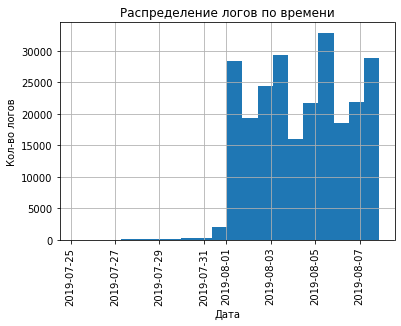

In [126]:
fig, test = plt.subplots()
logs_exp['datetime'].hist(bins=20).set_title('Распределение логов по времени')
plt.xticks(rotation=90)
plt.ylabel('Кол-во логов')
plt.xlabel('Дата')
plt.show();

На самом деле данные начинанаются с августа

In [127]:
logs_exp_august = logs_exp.query('date >"2019-07-31" ')

In [128]:
logs_exp_august['datetime'].min()

Timestamp('2019-08-01 00:07:28')

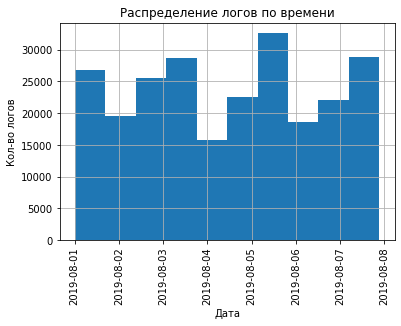

In [129]:
logs_exp_august['datetime'].hist().set_title('Распределение логов по времени')
plt.xticks(rotation=90)
plt.ylabel('Кол-во логов')
plt.xlabel('Дата')
plt.show();

In [130]:
print ('События', logs_exp_august['event_timestamp'].count() )

События 241298


In [131]:
print ('Пользователи', logs_exp_august['user_id'].nunique() )

Пользователи 7534


In [132]:
print ('Потеряли событий', logs_exp['event_timestamp'].count() - logs_exp_august['event_timestamp'].count() )
print ('Потеряли пользователей', logs_exp['user_id'].nunique() - logs_exp_august['user_id'].nunique() )

Потеряли событий 2828
Потеряли пользователей 17


После отрезании базы мы потеряли очень мало пользователей

In [133]:
logs_exp_august.groupby('exp_id').agg({'user_id': 'nunique'})

,user_id
exp_id,
246,2484
247,2513
248,2537


Пользователи всех трех эксперементальных групп есть.

 # Шаг 4. Воронка событий <a id="step4"></a>   
</div>

 ### События в логах

In [134]:
logs_exp_august['event_name'].value_counts()

MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: event_name, dtype: int64

### События по пользователям

In [135]:
funnel = logs_exp_august.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).reset_index()
display(funnel)

,event_name,user_id
0,MainScreenAppear,7419
1,OffersScreenAppear,4593
2,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


In [136]:
# Считаем дол. пользователей
funnel['share'] = (funnel['user_id']/logs_exp_august['user_id'].nunique()).round(3)
display(funnel)

,event_name,user_id,share
0,MainScreenAppear,7419,0.985
1,OffersScreenAppear,4593,0.610
2,CartScreenAppear,3734,0.496
3,PaymentScreenSuccessful,3539,0.470
4,Tutorial,840,0.111


Основной экран видят 98% пользователей, предложение 62%, корзину 50%, до успешной оплаты доходят 47% пользователей.

### Воронка событий

Судя по данным воронка следующая: Основной экран(MainScreenAppear	) > OffersScreenAppear > CartScreenAppear > PaymentScreenSuccessful	
Насчет Tutorial	возникают большие сомнения их всего 11 %, и такое впечатление, что это необязательная опция

In [137]:
funnel['count_2'] = funnel['user_id'].shift(1, fill_value=funnel.loc[0,'user_id'])
#funnel[]
funnel['share_prev'] = (funnel['user_id'] / funnel['count_2']).round(2)
del funnel['count_2']
display(funnel)

,event_name,user_id,share,share_prev
0,MainScreenAppear,7419,0.985,1.00
1,OffersScreenAppear,4593,0.610,0.62
2,CartScreenAppear,3734,0.496,0.81
3,PaymentScreenSuccessful,3539,0.470,0.95
4,Tutorial,840,0.111,0.24


Больше всего пользователей теряется на этапе предложения, на этот момент отваливается 38% по сравнению с предыдущим этапом.

In [138]:
payment_2_main_screen_share=funnel.loc[3, 'user_id']/funnel.loc[0, 'user_id']
display(payment_2_main_screen_share)

0.47701846610055265

До оплаты доходит 48 % видевших основной экран пользователей.

# Шаг 5. Эксперимент <a id="step5"></a>   
</div>

In [139]:
group_sizes = logs_exp_august.groupby('exp_id').agg({'user_id': 'nunique'}).reset_index()
A1_size = group_sizes.loc[0, 'user_id']
A2_size = group_sizes.loc[1, 'user_id']
B_size = group_sizes.loc[2, 'user_id']
display(group_sizes)
display(A1_size, A2_size, B_size)

,exp_id,user_id
0,246,2484
1,247,2513
2,248,2537


2484

2513

2537

 - Одинаковы ли контрольные группы?

In [140]:
#Считаем ежедневное число пользователей в каждой из групп
groups_by_days = logs_exp_august.pivot_table(index='date', columns='exp_id', values='user_id', aggfunc='nunique').reset_index()
display(groups_by_days)

exp_id,date,246,247,248
0,2019-08-01,1191,1282,1230
1,2019-08-02,1197,1221,1229
2,2019-08-03,1140,1176,1166
3,2019-08-04,1170,1169,1188
4,2019-08-05,1269,1263,1270
5,2019-08-06,1270,1320,1332
6,2019-08-07,1198,1212,1241


In [141]:
#Создаем выборки
sample_A1_daily = groups_by_days[246]
sample_A2_daily = groups_by_days[247]
sample_B_daily = groups_by_days[248]
display(sample_A1_daily)

0    1191
1    1197
2    1140
3    1170
4    1269
5    1270
6    1198
Name: 246, dtype: int64

In [142]:
from scipy import stats as st
import numpy as np
alpha = .05 
results_AA = st.ttest_ind(
    sample_A1_daily, 
    sample_A2_daily)

bonferroni_alpha = alpha / 3

print('p-значение для сравнения групп А1 и A2: ', results_AA.pvalue)

if (results_AA.pvalue < bonferroni_alpha):
    print("Отвергаем нулевую гипотезу для сравнения групп А1 и A2")
else:
    print("Не получилось отвергнуть нулевую гипотезу для сравнения групп А1 и A2")

p-значение для сравнения групп А1 и A2:  0.30899748048237163
Не получилось отвергнуть нулевую гипотезу для сравнения групп А1 и A2


Здесь далее будем считать нулевая гипотеза -  доли равны в рассматриваемых группах, альтернативная - доли не равны.

In [143]:
# Самое популярное mainsreen

In [144]:
groups_by_events = logs_exp_august.pivot_table(index='event_name', columns='exp_id', values='user_id', aggfunc='nunique').sort_values(by=246, ascending=False).reset_index()
groups_by_events.columns= ['event_name', 'A1', 'A2', 'B']
display(groups_by_events)

,event_name,A1,A2,B
0,MainScreenAppear,2450,2476,2493
1,OffersScreenAppear,1542,1520,1531
2,CartScreenAppear,1266,1238,1230
3,PaymentScreenSuccessful,1200,1158,1181
4,Tutorial,278,283,279


In [145]:
groups_by_events['A1_share'] = groups_by_events['A1']/A1_size
groups_by_events['A2_share'] = groups_by_events['A2']/A2_size
groups_by_events['B_share'] = groups_by_events['B']/B_size
display(groups_by_events)

,event_name,A1,A2,B,A1_share,A2_share,B_share
0,MainScreenAppear,2450,2476,2493,0.986312,0.985277,0.982657
1,OffersScreenAppear,1542,1520,1531,0.620773,0.604855,0.603469
2,CartScreenAppear,1266,1238,1230,0.509662,0.492638,0.484825
3,PaymentScreenSuccessful,1200,1158,1181,0.483092,0.460804,0.465510
4,Tutorial,278,283,279,0.111916,0.112614,0.109972


In [146]:
from scipy import stats as st
import numpy as np
import math as mth

### Разница в доли контрольных групп

#### Выбираем уровень значимость

Определяем alpha. Всего тестов будет 16. 
1. a1 и a2
2. a1 и b
3. a2 и b
4. объединенную a и b
И в каждой группе по четыре теста. Т. е. получаеся 4*4= 16. 

Выбираем изначальный уровень значимость alpha = 0.05
Используем поправку бонферонни. 

In [1]:
alpha_bonf = 0.05/16
display(alpha_bonf)

0.003125

#### Разница долей AA mainscreen

In [149]:
alpha = alpha_bonf # критический уровень статистической значимости

successes = np.array([2450, 2476])
trials = np.array([2484, 2513])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [150]:
# Пишем функция
def test_groups(share_1, share_2, n1, n2):
    aplha = alpha_bonf
    successes = np.array([share_1, share_2])
    trials = np.array([n1, n2])
    p1 = successes[0]/trials[0]
    p2 = successes[1]/trials[1]
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
    difference = p1 - p2
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

In [151]:
#Проверяем функцию
test_groups(2450, 2476, A1_size, A2_size)

p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [152]:
print('---A1/A2_Offer---')
test_groups(groups_by_events.loc[1, 'A1'], groups_by_events.loc[1, 'A2'], A1_size, A2_size)
print()
print('---A1/A2_Cart---')
test_groups(groups_by_events.loc[2, 'A1'], groups_by_events.loc[2, 'A2'], A1_size, A2_size)
print()
print('---A1/A2_Payment---')
test_groups(groups_by_events.loc[3, 'A1'], groups_by_events.loc[3, 'A2'], A1_size, A2_size)

---A1/A2_Offer---
p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

---A1/A2_Cart---
p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

---A1/A2_Payment---
p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Статистически значимых различий по долям основного экрана, предлжения, корзины, оплаты нет. Можно сказать, что разбиение на группы работает корректно.

## Сравнение с контрольным шрифтом

### Сравнение A1 и B

In [153]:
print('---A1/B_ Main Screen---')
test_groups(groups_by_events.loc[0, 'A1'], groups_by_events.loc[0, 'B'], A1_size, B_size)
print()
print('---A1/B_Offer---')
test_groups(groups_by_events.loc[1, 'A1'], groups_by_events.loc[1, 'B'], A1_size, B_size)
print()
print('---A1/B_Cart---')
test_groups(groups_by_events.loc[2, 'A1'], groups_by_events.loc[2, 'B'], A1_size, B_size)
print()
print('---A1/B_Payment---')
test_groups(groups_by_events.loc[3, 'A1'], groups_by_events.loc[3, 'B'], A1_size, B_size)

---A1/B_ Main Screen---
p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

---A1/B_Offer---
p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

---A1/B_Cart---
p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

---A1/B_Payment---
p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


У нас не получилось отвергнуть нулевую гипотезу о равенстве доле группы первой контрольной группы и экспериментальной группы ни по одномй из долей (основной экран, увидел предложение, положил в корзину, оплатил)

### Сравнение A2 и B

In [154]:
print('---A2/B Main Screen---')
test_groups(groups_by_events.loc[0, 'A2'], groups_by_events.loc[0, 'B'], A2_size, B_size)
print()
print('---A2/B Offer---')
test_groups(groups_by_events.loc[1, 'A2'], groups_by_events.loc[1, 'B'], A2_size, B_size)
print()
print('---A2/B Cart---')
test_groups(groups_by_events.loc[2, 'A2'], groups_by_events.loc[2, 'B'], A2_size, B_size)
print()
print('---A2/B Payment---')
test_groups(groups_by_events.loc[3, 'A2'], groups_by_events.loc[3, 'B'], A2_size, B_size)

---A2/B Main Screen---
p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

---A2/B Offer---
p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

---A2/B Cart---
p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

---A2/B Payment---
p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Не получилось отвергнуть нулевую гипотезу по всем фронтам, это значит у нас нет основнания считать, что группа вторая контрольная группа и экспериментальная различаются.

### Сравнение AA и B

Cчитаем объединенную группу AA

In [155]:
Big_AA_size = A1_size+ A2_size
display(Big_AA_size)

4997

In [156]:
groups_by_events['Big_AA'] = groups_by_events['A1'] + groups_by_events['A2']
display(groups_by_events)

,event_name,A1,A2,B,A1_share,A2_share,B_share,Big_AA
0,MainScreenAppear,2450,2476,2493,0.986312,0.985277,0.982657,4926
1,OffersScreenAppear,1542,1520,1531,0.620773,0.604855,0.603469,3062
2,CartScreenAppear,1266,1238,1230,0.509662,0.492638,0.484825,2504
3,PaymentScreenSuccessful,1200,1158,1181,0.483092,0.460804,0.465510,2358
4,Tutorial,278,283,279,0.111916,0.112614,0.109972,561


In [157]:
groups_by_events['Big_AA_share'] = groups_by_events['Big_AA']/Big_AA_size
display(groups_by_events)

,event_name,A1,A2,B,A1_share,A2_share,B_share,Big_AA,Big_AA_share
0,MainScreenAppear,2450,2476,2493,0.986312,0.985277,0.982657,4926,0.985791
1,OffersScreenAppear,1542,1520,1531,0.620773,0.604855,0.603469,3062,0.612768
2,CartScreenAppear,1266,1238,1230,0.509662,0.492638,0.484825,2504,0.501101
3,PaymentScreenSuccessful,1200,1158,1181,0.483092,0.460804,0.465510,2358,0.471883
4,Tutorial,278,283,279,0.111916,0.112614,0.109972,561,0.112267


Сравниваем AA и B

In [158]:
print('---AA/B Main Screen---')
test_groups(groups_by_events.loc[0, 'Big_AA'], groups_by_events.loc[0, 'B'], Big_AA_size, B_size)
print()
print('---AA/B Offer---')
test_groups(groups_by_events.loc[1, 'Big_AA'], groups_by_events.loc[1, 'B'], Big_AA_size, B_size)
print()
print('---AA/B Cart---')
test_groups(groups_by_events.loc[2, 'Big_AA'], groups_by_events.loc[2, 'B'], Big_AA_size, B_size)
print()
print('---AA/B Payment---')
test_groups(groups_by_events.loc[3, 'Big_AA'], groups_by_events.loc[3, 'B'], Big_AA_size, B_size)

---AA/B Main Screen---
p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

---AA/B Offer---
p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

---AA/B Cart---
p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

---AA/B Payment---
p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


При сравнении объединненой контрольной группы и экспреиметальной также не получилось отвергнуть гипотезы о равенстве долей основного экрана, предложения, корзины, оплаты.

# Выводы <a id='step6'> </a>

- В среднем приходится 32 события на одного пользователя
- При покупке пользователи проходят четрые этапа: основной экран, предложение, положить в корзину, оплата.
- Основной экран видят 98% пользователей, предложение 62%, корзину 50%, до успешной оплаты доходят 47% пользователей. До оплаты доходит 47 % видевших основной экран пользователей
- Больше всего пользователей теряется на этапе предложения, на этот момент отваливается 38% по сравнению с предыдущим этапом.
-  До оплаты доходит 48 % видевших основной экран пользователей.
- Тесты не нашли различия как отдельно между каждой контрольной группой и экспериментальной группjq, так и между объединной контрольной и экспериментальной группой. 